In [51]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [52]:
max([max(sequence) for sequence in train_data])

9999

In [53]:
import numpy as np

"원핫 인코딩. 정수 시퀀스를 이진 행렬로 인코딩"
def vectorize_squence(sequence, dimension = 10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence) :
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_squence(train_data)
x_test = vectorize_squence(test_data)


In [54]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')



In [55]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])



In [57]:
x_val = x_train[:10000]
partical_x_train = x_train[10000:]
y_val = y_train[:10000]
partical_y_train = y_train[10000:]

In [58]:
history = model.fit(partical_x_train,
                   partical_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.4856 - accuracy: 0.7987 - val_loss: 0.3616 - val_accuracy: 0.8725
Epoch 2/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.2846 - accuracy: 0.9057 - val_loss: 0.3025 - val_accuracy: 0.8819
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2132 - accuracy: 0.9295 - val_loss: 0.2831 - val_accuracy: 0.8866
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1667 - accuracy: 0.9446 - val_loss: 0.2788 - val_accuracy: 0.8879
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1341 - accuracy: 0.9585 - val_loss: 0.3038 - val_accuracy: 0.8830
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1116 - accuracy: 0.9647 - val_loss: 0.3150 - val_accuracy: 0.8829
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [59]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

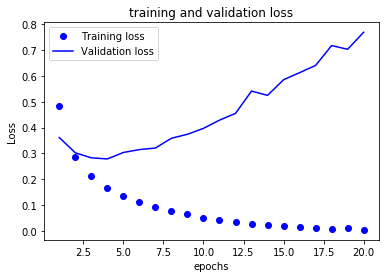

In [61]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

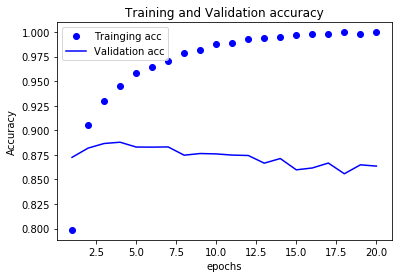

In [76]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Trainging acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [79]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)

result = model.evaluate(x_test, y_test)

result


Epoch 1/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.4575 - accuracy: 0.8193
Epoch 2/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2614 - accuracy: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2003 - accuracy: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


[1.9628323266220093, 0.5012000203132629]

In [84]:
model.predict(x_test)

array([[0.2587779 ],
       [0.9995142 ],
       [0.862124  ],
       ...,
       [0.14135104],
       [0.10344648],
       [0.61198294]], dtype=float32)